In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/king-country-houses-aa/king_ country_ houses_aa.csv


In [6]:
df = pd.read_csv("/kaggle/input/king-country-houses-aa/king_ country_ houses_aa.csv")

## Explore data: view possible columns

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Considerations for square feet data:

There are multiple values that indicate the square feet of the house:\

-`sqft_above1`: Square footage of the house apart from the basement.

-`sqft_basement`: Square footage of the basement.

-`sqft_living15`: Living room area in 2015 (post-renovation).

-`sqft_lot15`: Lot size area in 2015 (post-renovation).

-`sqft_lot`: Total square footage of the lot.

From these we will select 2 (`sqft_basement` and `sqft_above1`) and derive a new value.

In [9]:
df["sqft_total_area"] = df["sqft_above"] + df["sqft_basement"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total_area
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2570
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680


## Create X attributes, from the columns

In [10]:
X = df[["bedrooms", "bathrooms", "sqft_total_area"]]
X.head()

,bedrooms,bathrooms,sqft_total_area
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


Create Y (target) attribute from the price value

In [11]:
y = df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [22]:
print(f"X mean\n {X.mean()}, \nX std\n {X.std()}")

X mean
 bedrooms              3.370842
bathrooms             2.114757
sqft_total_area    2079.899736
dtype: float64, 
X std
 bedrooms             0.930062
bathrooms            0.770163
sqft_total_area    918.440897
dtype: float64


## Scale the data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_reshaped = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y_reshaped)
print(f"X mean\n {X_scaled.mean()}, \nX std\n {X_scaled.std()}")
print(f"y mean\n {y_scaled.mean()}, \ny std\n {y_scaled.std()}")

X mean
 1.025722174418874e-16, 
X std
 0.9999999999999999
y mean
 -3.6820796004780096e-17, 
y std
 1.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [27]:
X_train

array([[-0.39873715, -0.47362141, -0.32653889],
       [-1.47395936, -1.44746357, -1.17582386],
       [-0.39873715, -1.44746357, -1.08871771],
       ...,
       [-0.39873715,  0.50022075,  0.04366224],
       [-2.54918156, -1.77207762, -1.85089652],
       [ 0.67648506,  0.50022075,  1.14337739]])

In [28]:
X_test

array([[ 0.67648506,  0.1756067 , -0.0107791 ],
       [ 1.75170727,  1.14944885,  0.89294721],
       [ 0.67648506,  0.50022075,  1.84022659],
       ...,
       [ 0.67648506,  0.50022075,  0.38555388],
       [ 0.67648506, -0.47362141,  0.18520974],
       [ 0.67648506,  0.50022075,  0.53363434]])

In [29]:
y_train

array([[-0.58588173],
       [-0.77110793],
       [-0.84873949],
       ...,
       [ 0.09509692],
       [-0.8037949 ],
       [-0.61312088]])

In [30]:
y_test

array([[-0.47692515],
       [ 0.88503216],
       [ 1.35626939],
       ...,
       [-0.69483832],
       [ 0.17681436],
       [-0.50007842]])

## Fit the data into model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

## Confusion matrix

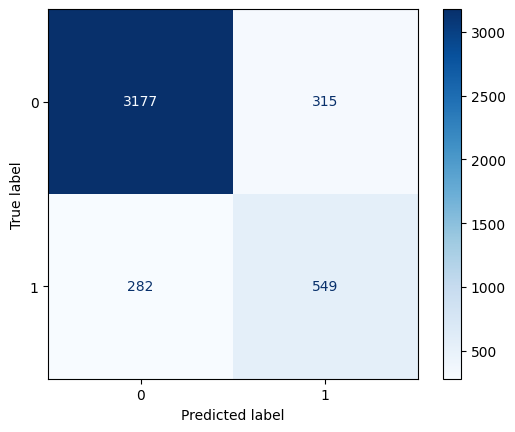

In [55]:
# create threshold to convert values to discrete
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

cm = confusion_matrix(y_test_class, y_pred_class)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap=plt.cm.Blues)
plt.show()